In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import warnings

from pandas import datetime
from subprocess import check_output
from pandas.plotting import lag_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv("Huge-stock-market-dataset/Data/Stocks/tsla.us.txt")
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2010-06-28,17.00,17.00,17.00,17.00,0,0
1,2010-06-29,19.00,25.00,17.54,23.89,18783276,0
2,2010-06-30,25.79,30.42,23.30,23.83,17194394,0
3,2010-07-01,25.00,25.92,20.27,21.96,8229863,0
4,2010-07-02,23.00,23.10,18.71,19.20,5141807,0


In [10]:
print(df.shape)
print(df.columns)

(1858, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')


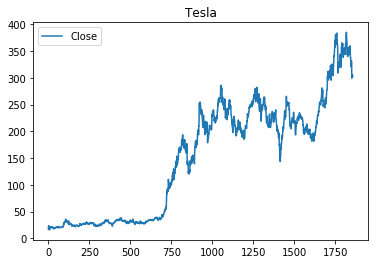

In [12]:
df[['Close']].plot()
plt.title("Tesla")
plt.show()

Text(0.5,1,'Tesla Cumulative Returns')

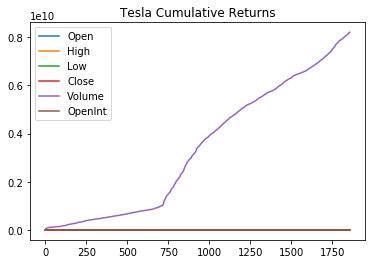

In [16]:
dr = df.cumsum()
#dr.head()
dr.plot()
plt.title('Tesla Cumulative Returns')

Text(0.5,1,'Tesla Autocorrelation plot')

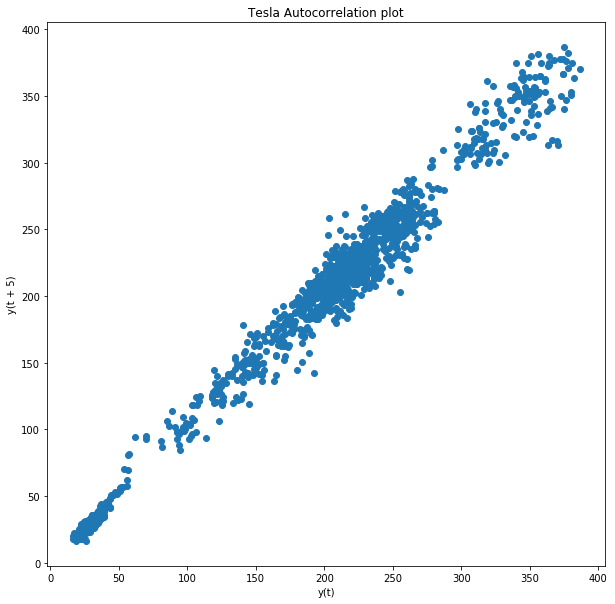

In [17]:
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=5)
plt.title('Tesla Autocorrelation plot')

In [18]:
df['Date'][1857]

'2017-11-10'

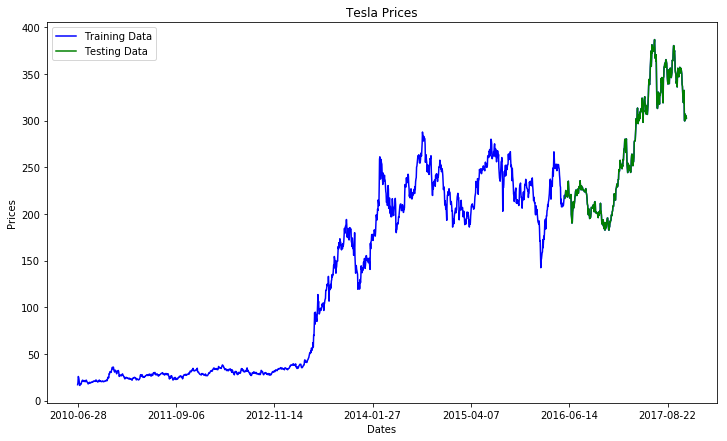

In [19]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Tesla Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()

In [20]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [22]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)


<class 'list'>
predicted=219.777561, expected=216.600000
predicted=216.851630, expected=217.910000
predicted=217.954770, expected=220.500000
predicted=220.328562, expected=224.990000
predicted=224.740253, expected=223.040000
predicted=223.293212, expected=221.480000
predicted=221.764359, expected=219.590000
predicted=219.780869, expected=220.000000
predicted=220.013807, expected=218.000000
predicted=218.292303, expected=222.240000
predicted=222.296188, expected=233.800000
predicted=233.305430, expected=234.980000
predicted=234.734558, expected=227.390000
predicted=228.032891, expected=219.500000
predicted=220.126835, expected=218.880000
predicted=218.873790, expected=216.950000
predicted=217.145432, expected=217.420000
predicted=217.906692, expected=217.810000
predicted=218.215023, expected=219.500000
predicted=219.585133, expected=220.680000
predicted=220.792114, expected=199.470000
predicted=200.569272, expected=195.690000
predicted=196.717734, expected=190.050000
predicted=190.40224

predicted=250.112272, expected=250.740000
predicted=251.051204, expected=247.910000
predicted=248.255255, expected=251.920000
predicted=251.714897, expected=247.000000
predicted=247.395571, expected=247.630000
predicted=247.828002, expected=246.210000
predicted=246.508676, expected=244.390000
predicted=244.540242, expected=246.110000
predicted=246.374720, expected=257.000000
predicted=256.653731, expected=262.400000
predicted=262.101277, expected=264.000000
predicted=263.945053, expected=260.600000
predicted=260.747284, expected=262.830000
predicted=262.657297, expected=251.560000
predicted=251.966288, expected=255.390000
predicted=255.597103, expected=255.700000
predicted=255.940683, expected=260.600000
predicted=260.467183, expected=277.020000
predicted=276.745357, expected=278.340000
predicted=277.915385, expected=278.040000
predicted=278.019069, expected=278.730000
predicted=278.600408, expected=286.900000
predicted=286.241069, expected=296.890000
predicted=296.480635, expected=302

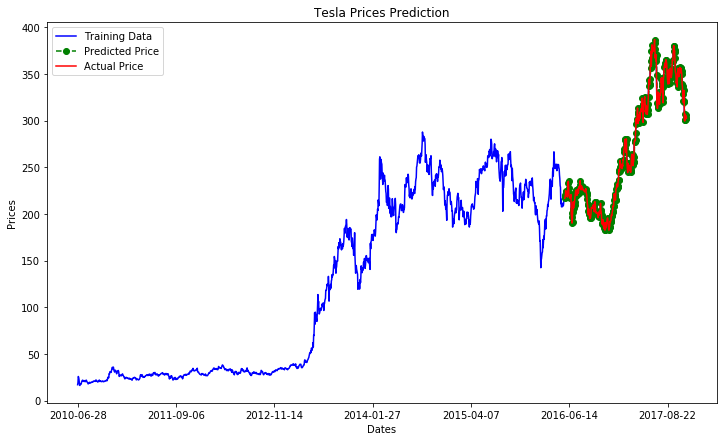

In [23]:
plt.figure(figsize=(12,7))
plt.plot(df['Open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()

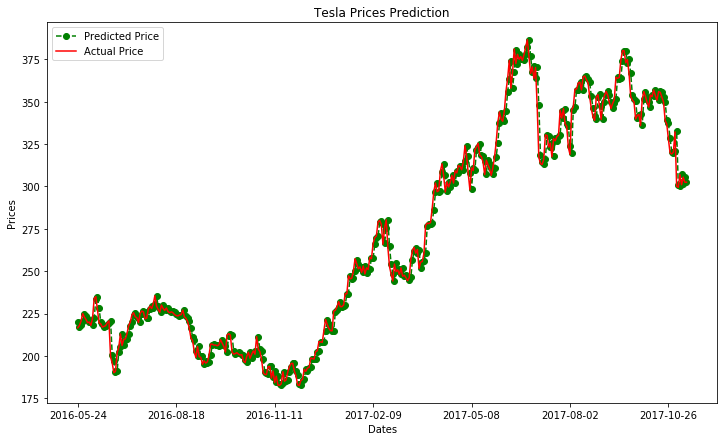

In [24]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.xticks(np.arange(1486,1856, 60), df['Date'][1486:1856:60])
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

In [27]:
df = pd.read_csv("Huge-stock-market-dataset/Data/Stocks/msft.us.txt").fillna(0)
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1986-03-13,0.06720,0.07533,0.06720,0.07533,1371330506,0
1,1986-03-14,0.07533,0.07533,0.07533,0.07533,409569463,0
2,1986-03-17,0.07533,0.07533,0.07533,0.07533,176995245,0
3,1986-03-18,0.07533,0.07533,0.07533,0.07533,90067008,0
4,1986-03-19,0.07533,0.07533,0.07533,0.07533,63655515,0


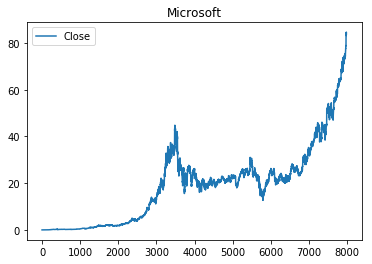

In [28]:
df[['Close']].plot()
plt.title("Microsoft")
plt.show()

Text(0.5,1,'Microsoft Cumulative Returns')

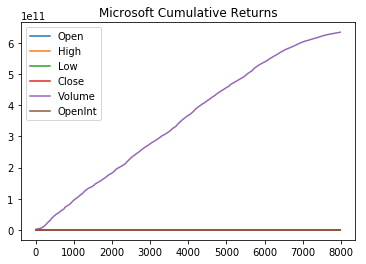

In [29]:
dr = df.cumsum()
dr.plot()
plt.title('Microsoft Cumulative Returns')

Text(0.5,1,'Microsoft Autocorrelation plot')

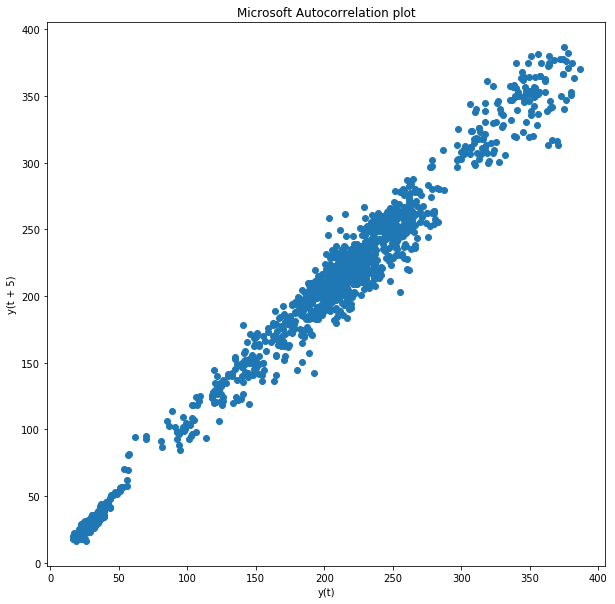

In [26]:
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=5)
plt.title('Microsoft Autocorrelation plot')

In [30]:
df['Date'][7982]

'2017-11-10'

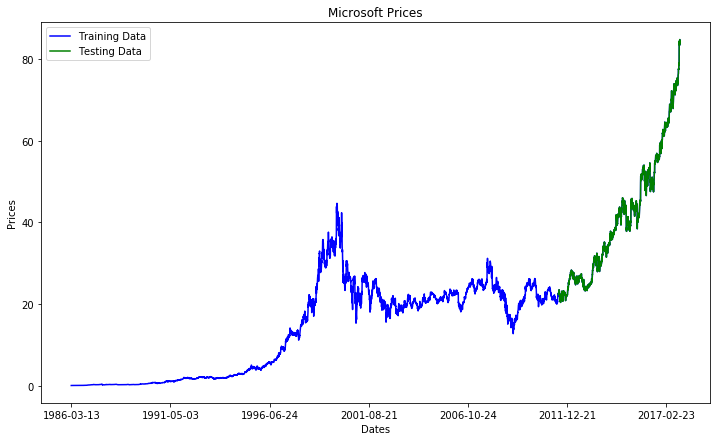

In [31]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Microsoft Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.xticks(np.arange(0,7982, 1300), df['Date'][0:7982:1300])
plt.legend()

In [32]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [34]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
predicted=22.603666, expected=22.450000
predicted=22.462277, expected=22.471000
predicted=22.469990, expected=22.471000
predicted=22.484053, expected=22.351000
predicted=22.351407, expected=22.493000
predicted=22.497046, expected=22.628000
predicted=22.630703, expected=22.986000
predicted=22.973369, expected=22.840000
predicted=22.840684, expected=22.670000
predicted=22.670027, expected=23.018000
predicted=23.029907, expected=23.479000
predicted=23.468956, expected=23.508000
predicted=23.489680, expected=23.018000
predicted=23.024742, expected=23.209000
predicted=23.224911, expected=23.247000
predicted=23.261524, expected=22.714000
predicted=22.709690, expected=22.614000
predicted=22.633711, expected=22.355000
predicted=22.382379, expected=21.898000
predicted=21.904850, expected=21.125000
predicted=21.158452, expected=20.785000
predicted=20.814997, expected=21.040000
predicted=21.058747, expected=20.701000
predicted=20.701069, expected=21.219000
predicted=21.205376, expe

predicted=27.447174, expected=27.461000
predicted=27.463182, expected=27.097000
predicted=27.114390, expected=26.447000
predicted=26.462959, expected=26.256000
predicted=26.286699, expected=26.005000
predicted=26.029016, expected=26.584000
predicted=26.577060, expected=26.437000
predicted=26.441825, expected=26.552000
predicted=26.533567, expected=26.567000
predicted=26.587549, expected=26.282000
predicted=26.280789, expected=26.005000
predicted=26.020884, expected=25.831000
predicted=25.851205, expected=25.233000
predicted=25.252144, expected=25.745000
predicted=25.751380, expected=25.449000
predicted=25.467084, expected=25.285000
predicted=25.268189, expected=25.319000
predicted=25.348407, expected=25.475000
predicted=25.472210, expected=25.449000
predicted=25.448039, expected=25.406000
predicted=25.407718, expected=24.937000
predicted=24.953327, expected=24.817000
predicted=24.830239, expected=24.720000
predicted=24.741690, expected=25.033000
predicted=25.027524, expected=25.701000


predicted=24.334781, expected=24.736000
predicted=24.754423, expected=24.595000
predicted=24.581596, expected=24.712000
predicted=24.707982, expected=25.101000
predicted=25.108219, expected=25.033000
predicted=25.022175, expected=24.942000
predicted=24.939556, expected=25.065000
predicted=25.076763, expected=24.790000
predicted=24.794977, expected=24.703000
predicted=24.707673, expected=24.728000
predicted=24.744512, expected=24.845000
predicted=24.843005, expected=24.871000
predicted=24.872371, expected=24.736000
predicted=24.739201, expected=24.951000
predicted=24.954506, expected=25.146000
predicted=25.146888, expected=24.942000
predicted=24.936678, expected=25.013000
predicted=25.017936, expected=25.110000
predicted=25.119384, expected=25.057000
predicted=25.052531, expected=24.970000
predicted=24.976171, expected=25.128000
predicted=25.133472, expected=25.413000
predicted=25.410430, expected=25.368000
predicted=25.361909, expected=25.508000
predicted=25.505004, expected=25.191000


predicted=32.992266, expected=33.101000
predicted=33.095723, expected=32.820000
predicted=32.854226, expected=33.372000
predicted=33.358278, expected=33.292000
predicted=33.304735, expected=33.726000
predicted=33.702187, expected=34.071000
predicted=34.079854, expected=33.746000
predicted=33.727486, expected=33.909000
predicted=33.915880, expected=33.863000
predicted=33.878577, expected=33.726000
predicted=33.718780, expected=33.410000
predicted=33.429290, expected=32.939000
predicted=32.957571, expected=32.640000
predicted=32.665337, expected=32.531000
predicted=32.553345, expected=32.547000
predicted=32.557552, expected=32.630000
predicted=32.636084, expected=31.489000
predicted=31.506127, expected=32.531000
predicted=32.541600, expected=33.265000
predicted=33.279231, expected=33.392000
predicted=33.324873, expected=33.337000
predicted=33.347395, expected=32.874000
predicted=32.885808, expected=32.718000
predicted=32.731019, expected=33.952000
predicted=33.957760, expected=33.427000


predicted=40.572030, expected=40.606000
predicted=40.699857, expected=39.794000
predicted=39.834494, expected=39.366000
predicted=39.369048, expected=39.988000
predicted=40.044328, expected=39.858000
predicted=39.849291, expected=41.060000
predicted=41.034263, expected=41.654000
predicted=41.649921, expected=41.348000
predicted=41.296510, expected=43.327000
predicted=43.317263, expected=42.311000
predicted=42.300334, expected=42.449000
predicted=42.399447, expected=42.987000
predicted=43.049483, expected=42.856000
predicted=42.808530, expected=43.450000
predicted=43.446940, expected=43.403000
predicted=43.409949, expected=43.784000
predicted=43.759729, expected=44.243000
predicted=44.247301, expected=44.301000
predicted=44.279887, expected=45.281000
predicted=45.264261, expected=45.067000
predicted=45.061261, expected=45.215000
predicted=45.191664, expected=44.948000
predicted=44.978061, expected=45.180000
predicted=45.169802, expected=46.042000
predicted=46.042200, expected=45.734000


predicted=45.022390, expected=43.801000
predicted=43.803169, expected=44.329000
predicted=44.374881, expected=44.206000
predicted=44.208098, expected=43.613000
predicted=43.602998, expected=44.434000
predicted=44.472439, expected=43.933000
predicted=43.935301, expected=44.197000
predicted=44.182564, expected=44.516000
predicted=44.547566, expected=44.460000
predicted=44.433972, expected=43.786000
predicted=43.809993, expected=43.054000
predicted=43.081659, expected=38.444000
predicted=38.518286, expected=40.449000
predicted=40.487121, expected=39.927000
predicted=40.025748, expected=41.087000
predicted=40.976747, expected=41.248000
predicted=41.370076, expected=41.399000
predicted=41.323136, expected=40.078000
predicted=40.131018, expected=40.259000
predicted=40.245743, expected=41.257000
predicted=41.274549, expected=40.687000
predicted=40.669215, expected=41.152000
predicted=41.158619, expected=42.017000
predicted=42.022278, expected=40.982000
predicted=40.959585, expected=41.001000


predicted=50.722279, expected=50.889000
predicted=50.865079, expected=51.084000
predicted=51.076893, expected=50.831000
predicted=50.842098, expected=50.452000
predicted=50.461921, expected=50.695000
predicted=50.703874, expected=50.482000
predicted=50.494154, expected=50.462000
predicted=50.467546, expected=49.541000
predicted=49.585975, expected=48.114000
predicted=48.157783, expected=48.424000
predicted=48.461636, expected=48.309000
predicted=48.338454, expected=48.055000
predicted=48.065555, expected=48.919000
predicted=48.940465, expected=49.142000
predicted=49.133109, expected=48.714000
predicted=48.710394, expected=49.569000
predicted=49.567142, expected=49.763000
predicted=49.750113, expected=48.336000
predicted=48.350158, expected=47.648000
predicted=47.699950, expected=47.473000
predicted=47.504977, expected=48.434000
predicted=48.417792, expected=49.220000
predicted=49.224770, expected=49.618000
predicted=49.598125, expected=49.327000
predicted=49.329621, expected=49.277000


predicted=64.216357, expected=64.406000
predicted=64.426491, expected=63.921000
predicted=63.915785, expected=64.248000
predicted=64.268883, expected=64.406000
predicted=64.404599, expected=64.702000
predicted=64.690400, expected=64.930000
predicted=64.935837, expected=65.088000
predicted=65.079419, expected=64.672000
predicted=64.683574, expected=65.573000
predicted=65.554390, expected=64.880000
predicted=64.904717, expected=65.128000
predicted=65.113506, expected=64.890000
predicted=64.927434, expected=64.880000
predicted=64.868823, expected=64.702000
predicted=64.733239, expected=64.574000
predicted=64.583160, expected=64.326000
predicted=64.350335, expected=64.614000
predicted=64.619575, expected=64.930000
predicted=64.935759, expected=64.742000
predicted=64.748448, expected=64.950000
predicted=64.953225, expected=66.739000
predicted=66.698390, expected=67.155000
predicted=67.126942, expected=67.333000
predicted=67.300612, expected=67.403000
predicted=67.402670, expected=68.154000


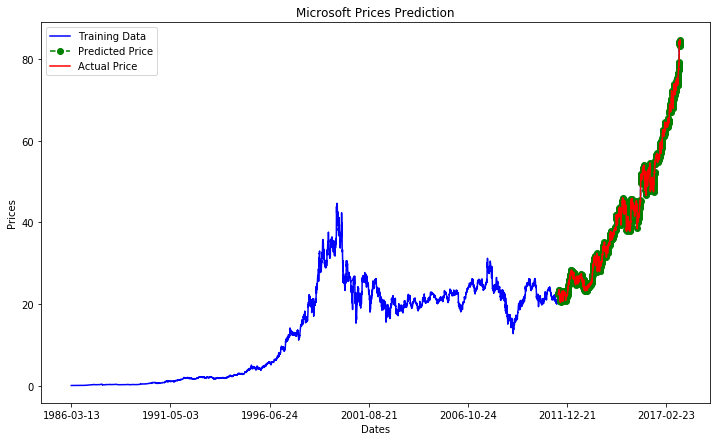

In [35]:
plt.figure(figsize=(12,7))
plt.plot(df['Open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('Microsoft Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,7982, 1300), df['Date'][0:7982:1300])
plt.legend()


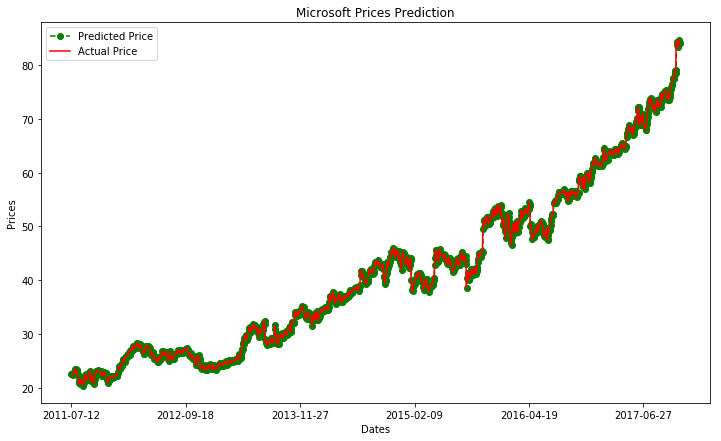

In [36]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('Microsoft Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(6386,7982, 300), df['Date'][6386:7982:300])
plt.legend()